# Tester notebook, running over one chunk of one file only 

In [1]:
# python
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [ ]:
samples = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_20p0mm",
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_100GeV_5p0GeV_400mm",
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_2p0mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",
    "2Mu2E_1000GeV_5p0GeV_40p0mm",
]
edge_fileset = utilities.make_fileset(edge_samples, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    # executor=processor.DaskExecutor(client=client),
    schema=NanoAODSchema,
    # maxchunks=1,
    skipbadfiles=True,
)

channels = ["baseNoLj"]
p = sidm_processor.SidmProcessor(
    channels,
    ["genE_base", "genMu_base"],
)

output = runner.run(edge_fileset, treename="Events", processor_instance=p)
out = output["out"]
# print(channels[0],)

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

In [15]:
ch1 = channels[0] #baseNoLj
# ch2 = channels[1] 
# ch3 = channels[2]

legsam = [s.split("_")[1] + "  " + s.split("_")[2] + "  " + s.split("_")[3] for s in samples]

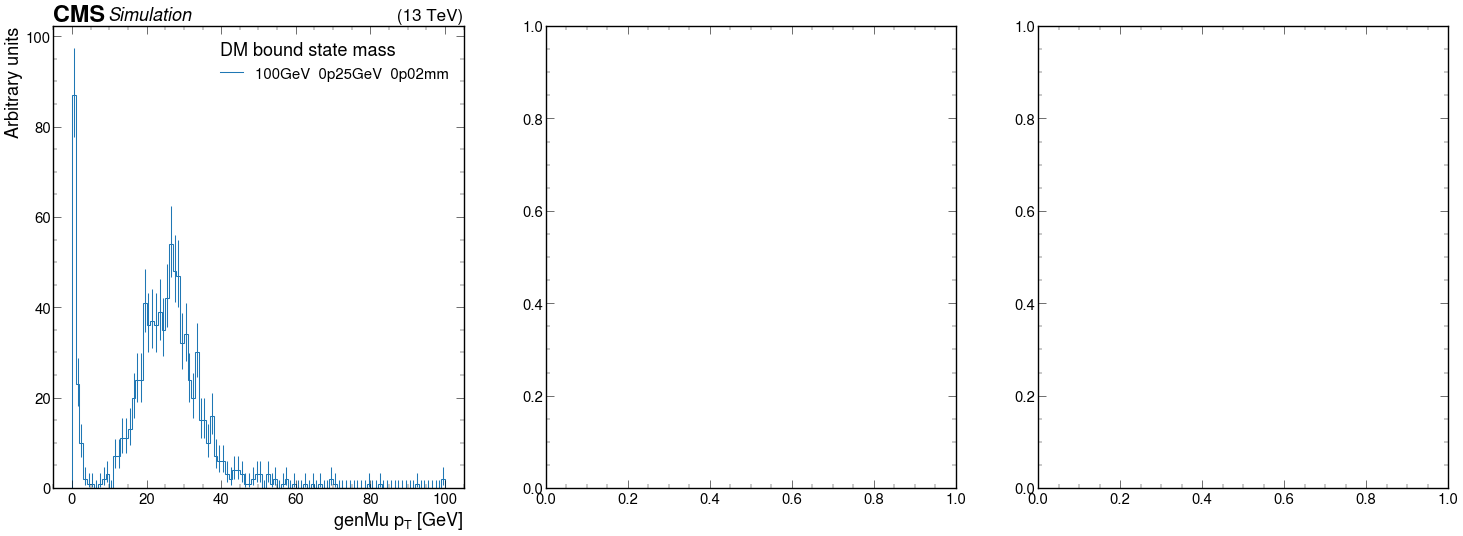

In [22]:
nplots = 3
plt.subplots(1, nplots, figsize=(nplots*12, 12))

plt.subplot(1, nplots, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genMu_pt"][channels[0], :], density=False,)
    plt.legend(legsam, title="DM bound state mass", alignment="left", loc=0)
    # plt.ylim(0, 0.6)
    plt.xlabel("genMu $p_{T}$ [GeV]")
    plt.ylabel("Arbitrary units")
    
    
# plt.subplot(1, nplots, 2)
# for sample in samples:
#     utilities.plot(out[sample]["hists"]["muon_eta_phi"][ch2, ::2j, :].project("muons_eta"), density=False,)
#     plt.legend(legsam, title="DM bound state mass", alignment="left", loc=0)
#     # plt.ylim(0, 0.6)
#     plt.xlabel("$\eta$ (ID)")
#     plt.ylabel("Arbitrary units")

    
# plt.subplot(1, nplots, 3)
# for sample in samples:
#     utilities.plot(out[sample]["hists"]["muon_eta_phi"][ch3, ::2j, :].project("muons_eta"), density=False,)
#     plt.legend(legsam, title="DM bound state mass", alignment="left", loc=0)
#     # plt.ylim(0, 0.6)
#     plt.xlabel("$\eta$ (ID variables)")
#     plt.ylabel("Arbitrary units")